In [42]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Data Pre Pocessing

In [16]:
data = pd.read_csv(filepath_or_buffer="H:\Downloads\data-science-internship-2024-main\data-science-internship-2024-main\daily_cp_activity_dataset.csv", delimiter= "," , header = 0)
data

,date,courier_partners_online,temperature,relative_humidity,precipitation
0,2021-05-01,49,18.27,0.57,0.00
1,2021-05-02,927,19.88,0.55,0.00
2,2021-05-03,40,16.88,0.60,0.00
3,2021-05-04,51,21.88,0.53,0.00
4,2021-05-05,50,21.11,0.54,0.00
...,...,...,...,...,...
756,2023-05-27,70,19.22,0.56,0.00
757,2023-05-28,76,27.26,0.64,0.41
758,2023-05-29,73,NaN,0.62,0.80
759,2023-05-30,81,18.35,0.57,0.00


# Data Exploration 

In [11]:
data.count ### Get the number of rows as number of observations we have and number of variables (number of columns)



<bound method DataFrame.count of            date  courier_partners_online  temperature  relative_humidity  \
0    2021-05-01                       49        18.27               0.57   
1    2021-05-02                      927        19.88               0.55   
2    2021-05-03                       40        16.88               0.60   
3    2021-05-04                       51        21.88               0.53   
4    2021-05-05                       50        21.11               0.54   
..          ...                      ...          ...                ...   
756  2023-05-27                       70        19.22               0.56   
757  2023-05-28                       76        27.26               0.64   
758  2023-05-29                       73          NaN               0.62   
759  2023-05-30                       81        18.35               0.57   
760  2023-05-31                       76        15.56               0.62   

     precipitation  
0             0.00  
1           

In [24]:
######### Analyze the correlation between  courier_partners_online and other variables ########


correlation_matrix = data[["courier_partners_online", "temperature"]].corr() #### correlation of Pearson

correlation_matrix_2 = data[["courier_partners_online", "relative_humidity"]].corr()

correlation_matrix_3 = data[["courier_partners_online", "precipitation"]].corr()

print(correlation_matrix)

print(correlation_matrix_2)

print(correlation_matrix_3)

# Accéder à la valeur de corrélation entre "Occurrences" et "Lines of Code"
correlation_value = correlation_matrix.loc["courier_partners_online", "temperature"]

correlation_value_2 = correlation_matrix_2.loc["courier_partners_online", "relative_humidity"]

correlation_value_3 = correlation_matrix_3.loc["courier_partners_online", "precipitation"]

print("Correlation between courier_partners_online and temperature :", correlation_value) 

print("Correlation between courier_partners_online and humidity :", correlation_value_2) 

print("Correlation between courier_partners_online and precipitation :", correlation_value_3) 


                         courier_partners_online  temperature
courier_partners_online                 1.000000     0.017999
temperature                             0.017999     1.000000
                         courier_partners_online  relative_humidity
courier_partners_online                 1.000000          -0.037991
relative_humidity                      -0.037991           1.000000
                         courier_partners_online  precipitation
courier_partners_online                 1.000000      -0.069646
precipitation                          -0.069646       1.000000
Correlation between courier_partners_online and temperature : 0.017998911780561344
Correlation between courier_partners_online and humidity : -0.03799133080690326
Correlation between courier_partners_online and precipitation : -0.069646134017024


### With the previous results we can say that "courier_partners_online" and "temperature" variables are somewhat correlated. So when the temperature increase the number of online courier partners  increase at the same time. 

### "courier_partners_online" and "relative_humidity" are  a little bit negative correlated. It means when the relative_humidity increase, the number of online courier partners decrease at the same time. It is the same case between "courier_partners_online" and "precipitation"

In [41]:
import pandas as pd


# Remplace  NaN values by value which is by default 0 here for me 
data["temperature"] = data["temperature"].fillna(0)
data["precipitation"] = data["precipitation"].fillna(0)
data["relative_humidity"] = data["relative_humidity"].fillna(0)

# Convertir la colonne "temperature" en entiers
data["temperature"] = data["temperature"].astype(int)

data["precipitation"] = data["precipitation"].astype(int)

data["relative_humidity"] = data["relative_humidity"].astype(int)

data["temperature"]
data["precipitation"]






0      0
1      0
2      0
3      0
4      0
      ..
756    0
757    0
758    0
759    0
760    1
Name: precipitation, Length: 761, dtype: int32

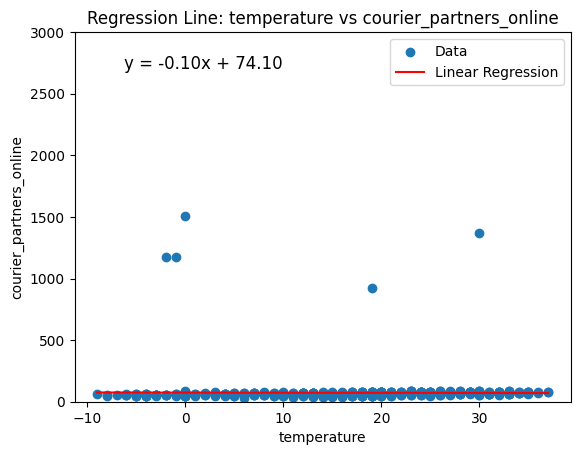

In [39]:



# Linear regression 
coefficients = np.polyfit(data["temperature"], data["courier_partners_online"], 1)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(data["temperature"]), max(data["temperature"]), 100)
y_pred = polynomial(x_range)

plt.scatter(data["temperature"], data["courier_partners_online"], label="Data")
plt.plot(x_range, y_pred, color='red', label="Linear Regression")
plt.xlabel("temperature")
plt.ylabel("courier_partners_online")
plt.title("Regression Line: temperature vs courier_partners_online")

# Add the equation of trend curve
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12)

plt.legend()
plt.ylim(0, 3000)  # Scale for  (y-axis)
plt.show()


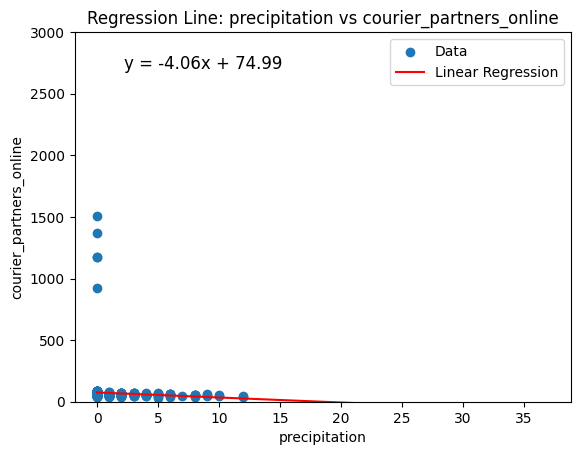

In [40]:

# Linear regression 
coefficients = np.polyfit(data["precipitation"], data["courier_partners_online"], 1)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(data["precipitation"]), max(data["temperature"]), 100)
y_pred = polynomial(x_range)

plt.scatter(data["precipitation"], data["courier_partners_online"], label="Data")
plt.plot(x_range, y_pred, color='red', label="Linear Regression")
plt.xlabel("precipitation")
plt.ylabel("courier_partners_online")
plt.title("Regression Line: precipitation vs courier_partners_online")

# Add the equation of trend curve
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"
plt.text(0.1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12)

plt.legend()
plt.ylim(0, 3000)  # Scale for  (y-axis)
plt.show()

# Modeling

RMSE: 139.08101271709742


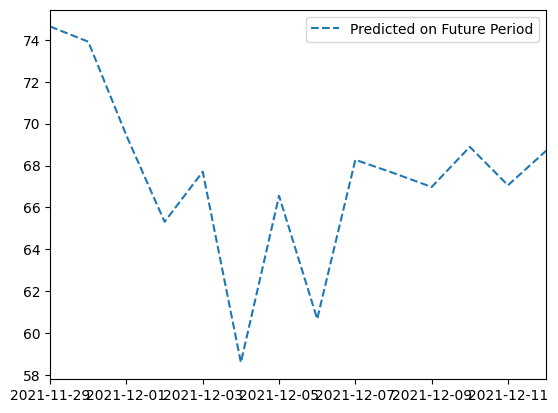

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



# remove data with missing values
data = data.dropna()

# Use useful features
features = ['temperature', 'relative_humidity', 'precipitation']
X = data[features]
y = data['courier_partners_online']

# Divide dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.225, random_state=42)

# create linear regression model
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# Do prediction on testing set
predictions = model.predict(X_test)

# Evaluate performance of the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")

# Do prediction to 2 weeks period
future_start_date = pd.to_datetime('2021-11-29')  # Remplacez cette date par la date de début de votre période future
future_end_date = future_start_date + pd.DateOffset(days=13)  # Période de 2 semaines

# Create a DataFrame for future period
future_dates = pd.date_range(future_start_date, future_end_date)
future_data = pd.DataFrame(index=future_dates, columns=features)

# replace values by values on corresponding period
future_data['temperature'] = [21.83,18.22,9.76,-3,4.89,5.96,3.68,4.11,7.66,3.64,6.59,9.34,5.75,10.31]
future_data['relative_humidity'] = [0.53,0.57,0.81,0.98,0.91,1.0,0.99,0.93,0.89,0.9,0.99,0.83,0.97,0.88]
future_data['precipitation'] = [0.0,0.0,0.66,1.16,0.82,4.01,0.99,3.33,0.79,0.81,0.97,0.79,0.95,0.78]

# Do prediction for future period
future_predictions = model.predict(future_data)

# Visualiser les résultats
#plt.plot(y_test.index, y_test.values, label='Actual')
#plt.plot(y_test.index, predictions, label='Predicted on Test Set')
plt.plot(future_data.index, future_predictions, label='Predicted on Future Period', linestyle='dashed')
plt.legend()



# Ajust  absciss axis to display only the future period
plt.xlim([future_start_date, future_end_date])
plt.show()


# Evaluation and Further developement 

### This code is a machine learning script that uses linear regression to predict the number of courier partners online based on weather-related features such as temperature, relative humidity, and precipitation. It also includes a section for making predictions for a future period (2 weeks) and visualizing the results.

## Description:

## Import Libraries:

### pandas: Data manipulation 
### library.train_test_split from sklearn.model_selection: Splits the dataset into training and testing sets.
### LinearRegression from sklearn.linear_model: Linear regression 
### model.mean_squared_error from sklearn.metrics: Metric for evaluating the model.
### matplotlib.pyplot as plt: Plotting library.

## Data Cleaning:

### Drops rows with missing values.
### Feature Selection:

### Chooses relevant features: 'temperature', 'relative_humidity', 'precipitation'.
## Train-Test Split:

### Divides the dataset into training and testing sets.

## Model Training:

### Creates a linear regression model.Trains the model using the training data.

## Model Evaluation:

### Performs predictions on the testing set.Evaluates the model performance using the Root Mean Squared Error (RMSE).

## Future Period Prediction:

### Defines a future period of 2 weeks starting from '2021-11-29'.
### Creates a DataFrame (future_data) for this period with specific values for temperature, relative humidity, and precipitation.
### Makes predictions for the future period using the trained linear regression model.

## Visualization:

### Plots the predicted values for the future period with dashed lines.

### Adjust X-axis: Sets the x-axis limits to display only the future period.

## Possible Improvements:

## Data Exploration:

### Understand the data distribution and relationships between variables before choosing features.

## Feature Engineering:

### Explore additional features that might improve model performance.

## Hyperparameter Tuning:

### Tune hyperparameters of the linear regression model for better predictions.

## Cross-Validation:

### Implement cross-validation to get a more robust estimate of the model's performance.

## Visualizations:

### Add more informative labels to the plot for clarity.Include the actual values for better comparison.

## Error Analysis:

### Investigate specific instances where predictions deviate significantly from actual values to understand model limitations.

## Handling Outliers:

### Check and handle outliers that might affect model performance.

# My background and Wolt

### During my previous years of study, I was able to develop my skills in machine learning, artificial intelligence and programming during different internships and different academic projects. My last internship at ETS (Ecole de Technologie Supérieure) in Montreal allowed me to put my data mining skills into practice on a challenging subject which was the following: “empirical analysis (data mining) of open source software.” you can find my contributions to this project as well as others via my github profile as follow: yacinekhtr (github.com). I would be delighted To be part of Wolt to use my skills to help the company to make life easier for citizens thanks to prediction models to facilitate transactions, deliveries, road traffic, goods.

